### <p style="text-align: right;"> &#9989; Jacob Jensen

# Day 18 Pre-Class Assignment: Random Numbers

<img src="https://cdn-images-1.medium.com/max/1600/1*B7d5Fr27lsH3uHvzF720IA.png" width=300px>

## Goals for today's pre-class assignment

* Explore different methods for generating random numbers
* Pratice using the `if`/`elif`/`else` keywords combined with random numbers 

The theme of this week is creating and using random numbers to do a wide range of things, such as modeling randomness that naturally needs to be in our models, or using them to solve problems that would otherwise be too difficult to solve. 

## Assignment instructions

**This assignment is due by 11:59pm the day before class,** and should be uploaded into the "Pre-class assignments"  submissions folder for Day 18.  Submission instructions can be found at the end of the notebook.

---
## Revisiting random numbers

We've already been using random numbers in a variety of ways in this course, but the next week or so of material will use random numbers in a number of new modeling contexts.  As a reminder of some of the ways we can access random numbers in Python, re-watch the following video:

In [ ]:
# You are encourage to watch the video in full-screen mode
from IPython.display import YouTubeVideo
YouTubeVideo("fF841G53fGo",width=640,height=360)  # random numbers

Here are some of the imports we will use in this assignment. Notice that we're importing both `random` *and* `numpy`, which also has a `random` module.  There is also an example for how you can set a specific seed for the `random` module and the `np.random` module, which can be useful for testing code to ensure that you understand the results. **Note**: If you want to use a specific seed, you need to make sure the call to the `seed` function is before the command that is generating the random numbers.

In [1]:
import random
import matplotlib.pyplot as plt
import timeit
import numpy as np
%matplotlib inline

random.seed(1) # this initializes the seed - see question 6 below
np.random.seed(1)

### Practicing random number generation

The following questions are designed to give you a bit of practice with generating a variety of random numbers. Make sure you are able to accomplish all the tasks included below.

**Question 1**: Write code below to generate 100 random **floats** uniformly distributed between 0 and 1. Plot a histogram of the result values. What happens to your histogram as you generate more values?

(array([10.,  8.,  6., 14., 13.,  9., 12.,  6., 11., 11.]),
 array([0.01507042, 0.11350889, 0.21194736, 0.31038584, 0.40882431,
        0.50726278, 0.60570126, 0.70413973, 0.80257821, 0.90101668,
        0.99945515]),
 <a list of 10 Patch objects>)

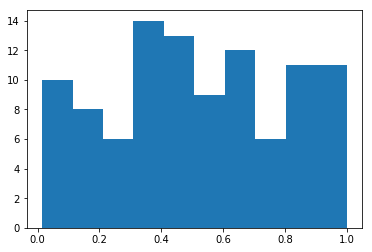

In [7]:
randAr = np.random.random(100)
plt.hist(randAr)

As more values are plotted, the histogram tends to level off.

**Question 2**: Generate an array with 100 random **integers** distributed between -1 and 3. Plot a histogram of those values.

(array([24.,  0.,  0., 23.,  0.,  0., 25.,  0.,  0., 28.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

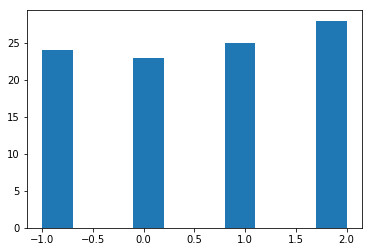

In [25]:
randIntAr = np.random.randint(-1,3, 100)
plt.hist(randIntAr)

**Question 3**: Write code below to generate 10, 100, 1000, and 10000 random floats in the interval $[-5,5]$ and make a histogram for each case. Create a markdown cell after the code and comment on what patterns you see. You might want to try using NumPy's random module for getting numbers from a [uniform distribution](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) for this problem.

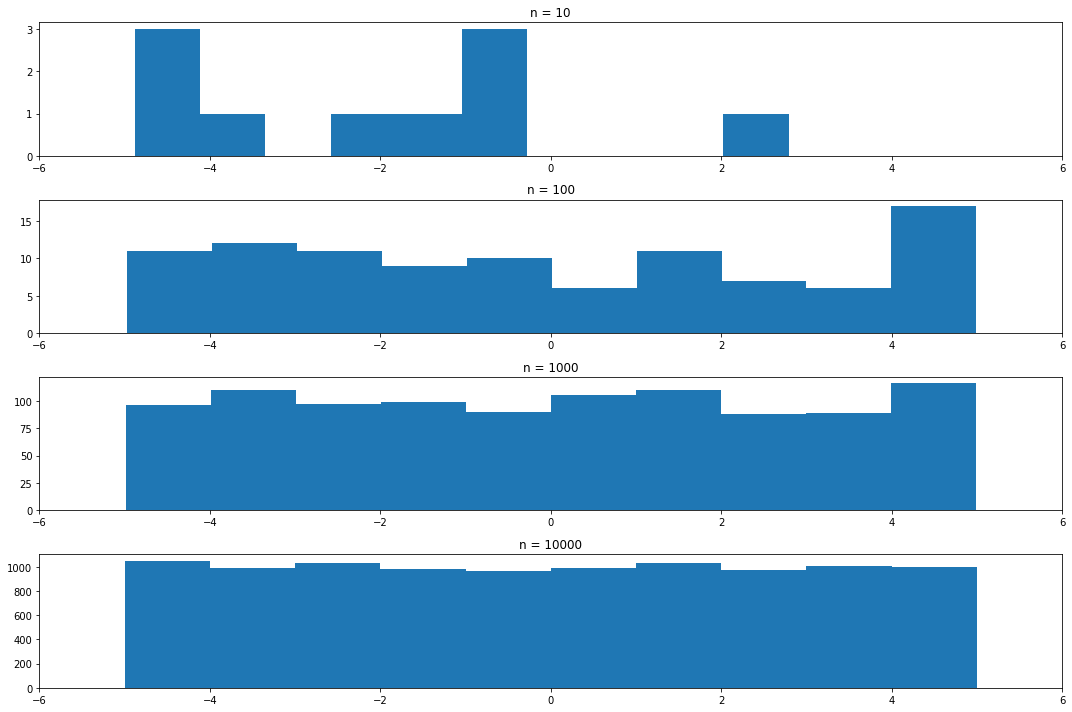

In [34]:
sizeAr = [10, 100, 1000, 10000]

fig, ax = plt.subplots(len(sizeAr),1, figsize = (15,10))

for i in range(len(sizeAr)):
    data = np.random.uniform(-5,5, sizeAr[i])
    ax[i].set_title('n = {}'.format(sizeAr[i]))
    ax[i].hist(data)
    ax[i].set_xlim(-6,6)
    
plt.tight_layout()

**Question 4**:  Using Pandas, load the 2018 temperature data (`2018_temp_noaa.csv`) from Day 18's in-class assignment. Then, use Pandas to compute the mean and standard deviation for the mean temperature values.

Take the the mean and standard deviation of the mean temperatures and use NumPy's `random` module to produce random numbers from a [normal distribution](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal) using the mean and standard deviation you just computed to generate an array with 10, 100, 1000, 10000 samples. Plot the results to see if it converges to a "bell curve" as you increase the number of samples.

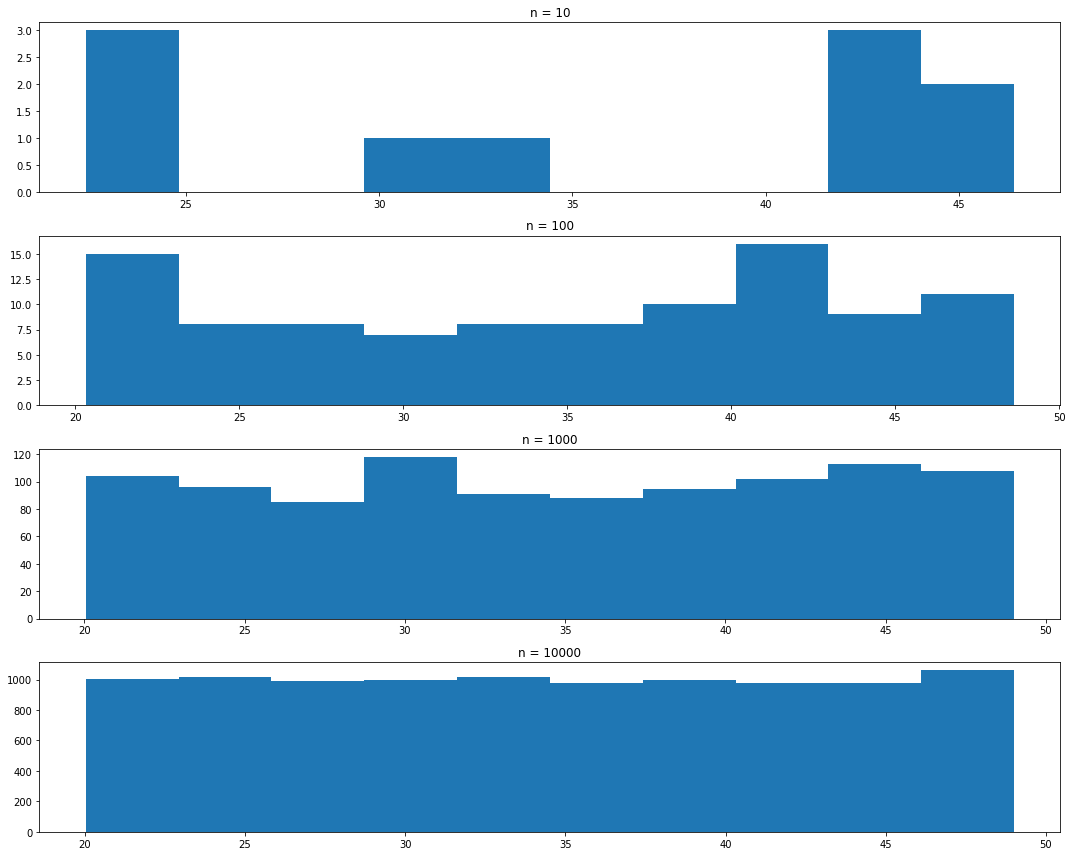

In [42]:
import pandas as pd
tempData = pd.read_csv("2018_temp_noaa.csv")

std = tempData['TAVG'].std()
mean = tempData['TAVG'].mean()

sizeAr = [10, 100, 1000, 10000]

fig, ax = plt.subplots(len(sizeAr),1, figsize = (15,12))

for i in range(len(sizeAr)):
    data = np.random.uniform(mean, std, sizeAr[i])
    ax[i].set_title('n = {}'.format(sizeAr[i]))
    ax[i].hist(data)
    
plt.tight_layout()

**Question 5**:
Broadly across science and engineering you will come across a very wide range of different types of random numbers. We have looked at three different options above:
1. floats chosen uniformly between two values,
2. integers chosen uniformly between two values
3. floats chosen that come from a normal distribution (the so-called ["bell curve"](https://en.wikipedia.org/wiki/Normal_distribution))

Next, look through [this list of Python's different choice for distributions](https://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions) and pick three. Make a subplot with one row and three columns that compares the three distributions you chose using 1000 samples for each plot. Label as usual, and put a title that has the name of the distribution.

Text(0.5, 1.0, 'Log Series, P = 0.5')

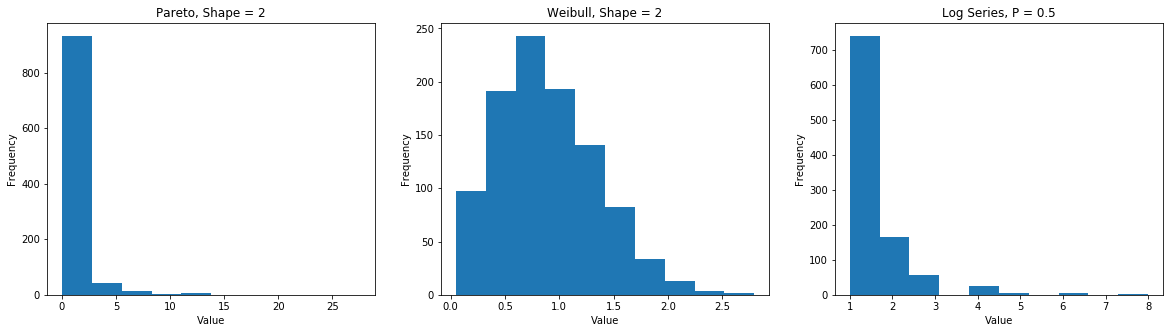

In [61]:
paretoAr = np.random.pareto(2, 1000)
weibullAr = np.random.weibull(2, 1000)
logseriesAr = np.random.logseries(0.5, 1000)

dist, ax = plt.subplots(1,3, figsize=(20,5))

for i in range(3):
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel('Value')

ax[0].hist(paretoAr)
ax[0].set_title('Pareto, Shape = 2')

ax[1].hist(weibullAr)
ax[1].set_title('Weibull, Shape = 2')

ax[2].hist(logseriesAr)
ax[2].set_title('Log Series, P = 0.5')


**Question 6**: As we mentioned in a prior assignment, one of the interesting aspects of random number generators are that they are not **entirely** random! Think about this for a moment: computers are designed to be able to calculate very precise things with very precise instructions - how could one get randomness out of that? If the computer is following precise rules, it will only know to follow exactly those rules the next time. The way it works is that it starts with some number - _which is the seed defined above_ - and that generates a sequence; a different seed will generate a different sequence. This is very important: if you want to generate that same sequence again, you can. This means that you can make your code reproducable, which is crucial for testing and debugging your code -- often you really don't want a _truly_ random sequence! On the other hand, once you are ready to put your code in use, you can choose something like the current time to generate the seed, and that will be a new and unique sequence. 

Your **goal** is to show that specifying a seed will allow you to create reproducible sequence of numbers. To do this, write a short code that uses subplots to make a 2x2 array of plots. For the subplots located at positions [0,0] and [0,1], create a histogram of 1000 random numbers using the same seed (example seed = 456). For the subplots located at positions [1,0] and [1,1], create a histogram of 1000 random numbers using the same seed but different than the first row (example seed = 789). You can use any of the random number generators of your choice (e.g. uniform). 

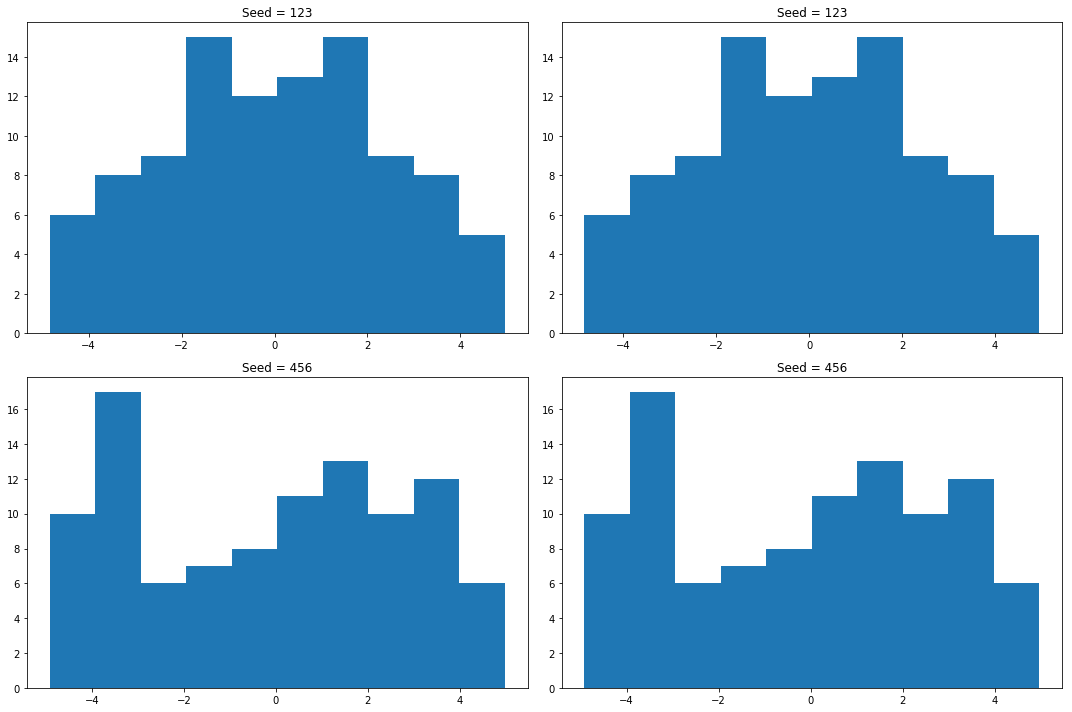

In [68]:
fig, ax = plt.subplots(2,2, figsize = (15,10))

seed1 = 123
seed2 = 456

for i in range(2):
    np.random.seed(seed1)
    data = np.random.uniform(-5,5, 100)
    ax[0,i].set_title('Seed = {}'.format(seed1))
    ax[0,i].hist(data)
    
for i in range(2):
    np.random.seed(seed2)
    data = np.random.uniform(-5,5, 100)
    ax[1,i].set_title('Seed = {}'.format(seed2))
    ax[1,i].hist(data)
    
plt.tight_layout()

**Question 7**: Explain what this code does.
```
import numpy as np

foo = ['a', 'b', 'c', 'd', 'e']
print(np.random.choice(foo))
```

How would you change the code to choose more than one thing? What if you wanted the choices to be unique?

The code will will print out a letter from a-e, selecting one at random. If you wanted to have each choice being unique, have it index through the list and after every choice, delete the letter from the list. 

### A reminder about "elif" statements
When trying to evaluate conditions to make a decision in your code, sometimes `elif` is used when there are more than two conditions that we want to check in order to decide how the code behaves. Here is a simple example for how `elif` can be used. You've likely already used `elif` for code you've written, but this should be a nice reminder if you haven't done it in a while. Note that this simple example doesn't use `else` at all -- can you think of a way that you might rewrite this in a way that would?

In [ ]:
import random
x = random.randint(-1,5)
print(x)
if x < 3 and x >-1:
    print("too small!")
elif x > 3:
    print("too big!")
elif x == 3:
    print("perfect!")
elif x == -1:
    print("negative?")

**Question 8**: Use a random number generator to simulate the roll of a die (from 1 to 6); then use `if`/`elif`/`else` to sort the outcome. Count how many times 1 appears, how many times 6 appears, and also how many times a non-1 non-6 number appears. 
Try this for 100, 1000, 10000 times. Does the number of 1's and 6's appear to converge to 1/6 as the number of rolls increases?

In [84]:
sizeAr = [10, 100, 1000, 10000]

for i in range(len(sizeAr)):
    sixCount = 0
    oneCount = 0
    elseCount = 0
    data = np.random.randint(1,7, sizeAr[i])
    for val in data:
        if val == 6:
            sixCount += 1
        elif val == 1:
            oneCount += 1
        else:
            elseCount += 1
    print('n = {} Ratios\nSix: {:.3f}\nOne: {:.3f}\nOthers: {:.3f}\n\n'.format(sizeAr[i], sixCount/sizeAr[i], oneCount/sizeAr[i], elseCount/sizeAr[i]))

n = 10 Ratios
Six: 0.100
One: 0.200
Others: 0.700


n = 100 Ratios
Six: 0.190
One: 0.130
Others: 0.680


n = 1000 Ratios
Six: 0.163
One: 0.162
Others: 0.675


n = 10000 Ratios
Six: 0.161
One: 0.168
Others: 0.671




Some possibly useful links:

* Look up the [extra functions](https://docs.scipy.org/doc/numpy/reference/routines.random.html) associated with the random module 
* [Python "random" module documentation](https://docs.python.org/3/library/random.html)
* [Numpy "random" module](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

Here are some interesting links on what you use random numbers to do in programming:

* [Wikipedia article on "Applications of randomness"](https://en.wikipedia.org/wiki/Applications_of_randomness)
* [Wikipedia article on random number generation](https://en.wikipedia.org/wiki/Random_number_generation)


### Assignment wrapup

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [85]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the submission link for Day 18, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees